In [4]:
import sys
import os

# 1. Get current directory (Jupyter equivalent of dirname(__file__))
current_dir = os.getcwd()

# 2. Get parent directory
parent_dir = os.path.dirname(current_dir)

# 3. Add to sys.path if it's not already there
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [5]:
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import cv2 as cv

import logic.edge_detection.EdgeDetector as EdgeDetector
import logic.hough_transform.HoughTransform as HoughTransform
import py_logic.lines_visualizing as py_visual

In [119]:
image_path = (
    "D:\\Source\\Diplom\\tryouts\\tryout2_image_deskweing\\implementation\\images\\road.png"
)
image = Image.open(image_path).convert("L")
image = np.array(image)
grey = np.array(image, dtype=np.float64) / 255.0

start_time = time.time()

canny = EdgeDetector.CannyEdgeDetector()

canny_result = canny.get_canny_img(
    grey,
    sigma=1,
    hight_threshold=0.70
)

end_time = time.time()

print(f"Time to find edges: {end_time-start_time}")

Time to find edges: 0.6764750480651855


Text(0.5, 1.0, 'Canny detector')

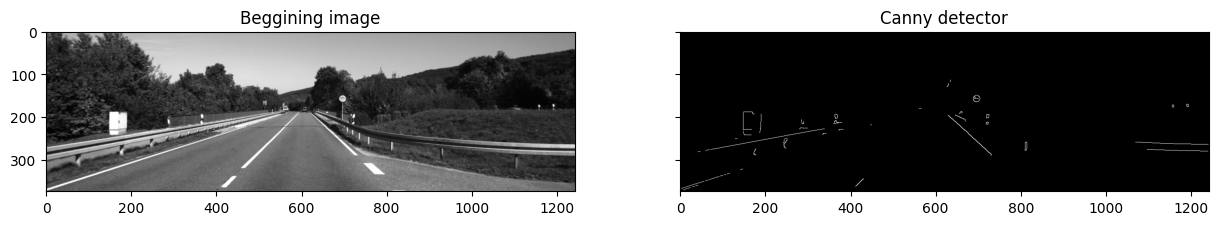

In [120]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 15))
ax[0].imshow(grey, cmap="gray")
ax[1].imshow(canny_result, cmap="gray")
ax[0].set_title("Beggining image")
ax[1].set_title("Canny detector")

Check the threshold value
accumulator max value:  334.0
Score: 334 | Index: (176, 27)
Score: 263 | Index: (173, 24)
Score: 229 | Index: (175, 26)


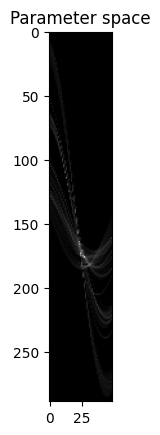

In [ ]:
# HOUGH TRANSFORM

rho = 9
theta = 0.261 / 4
threshold = 334


hough_transform = HoughTransform.HoughTransform(canny_result, theta, rho)

accumulator, lines = hough_transform.hough_lines(threshold, -np.pi / 2, np.pi / 2)
lines = np.array(lines)
accumulator = np.array(accumulator)

try:
    # Show the image with the lines found
    lines_img, mask = py_visual.draw_lines(image, lines)
except ValueError:
    print("Check the threshold value")


# Print biggest 3 values:
top_n_values, top_n_indices = accumulator.ravel()[
    np.argsort(accumulator, axis=None)[-3:]
], np.unravel_index(np.argsort(accumulator, axis=None)[-3:], accumulator.shape)
flat_indices = np.argsort(accumulator, axis=None)
top_3_flat = flat_indices[-3:]
top_3_indices = np.unravel_index(np.flip(top_3_flat), accumulator.shape)
for r_idx, t_idx in zip(top_3_indices[0], top_3_indices[1]):
    score = accumulator[r_idx, t_idx]
    print(f"Score: {score:.0f} | Index: ({r_idx}, {t_idx})")

plt.imshow(accumulator, cmap="gray")
plt.title("Parameter space")
plt.show()

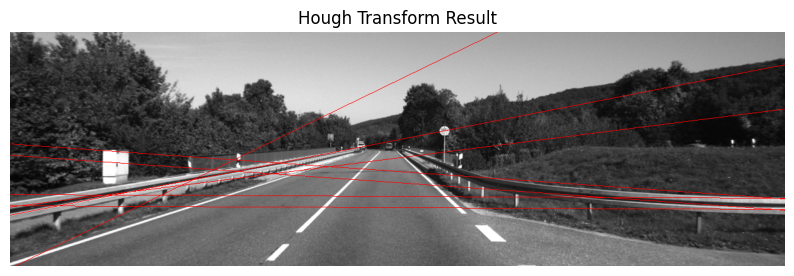

In [47]:
lines_img_rgb = cv.cvtColor(lines_img, cv.COLOR_BGR2RGB)

# 2. Configure the plot
plt.figure(figsize=(10, 10))  # Optional: Make the image larger
plt.imshow(lines_img_rgb)
plt.axis("off")  # Optional: Hide the axes (numbers on the side)
plt.title("Hough Transform Result")
plt.show()

Tape Image

In [87]:
image_path = (
    "D:\\Source\\Diplom\\tryouts\\tryout2_image_deskweing\\implementation\\images\\tape.jpg"
)
image = Image.open(image_path).convert("L")
image = np.array(image)
grey = np.array(image, dtype=np.float64) / 255.0

start_time = time.time()

canny = EdgeDetector.CannyEdgeDetector()

canny_result = canny.get_canny_img(grey, sigma=1, hight_threshold=0.45)

end_time = time.time()

print(f"Time to find edges: {end_time-start_time}")

Time to find edges: 0.026001930236816406


Text(0.5, 1.0, 'Canny detector')

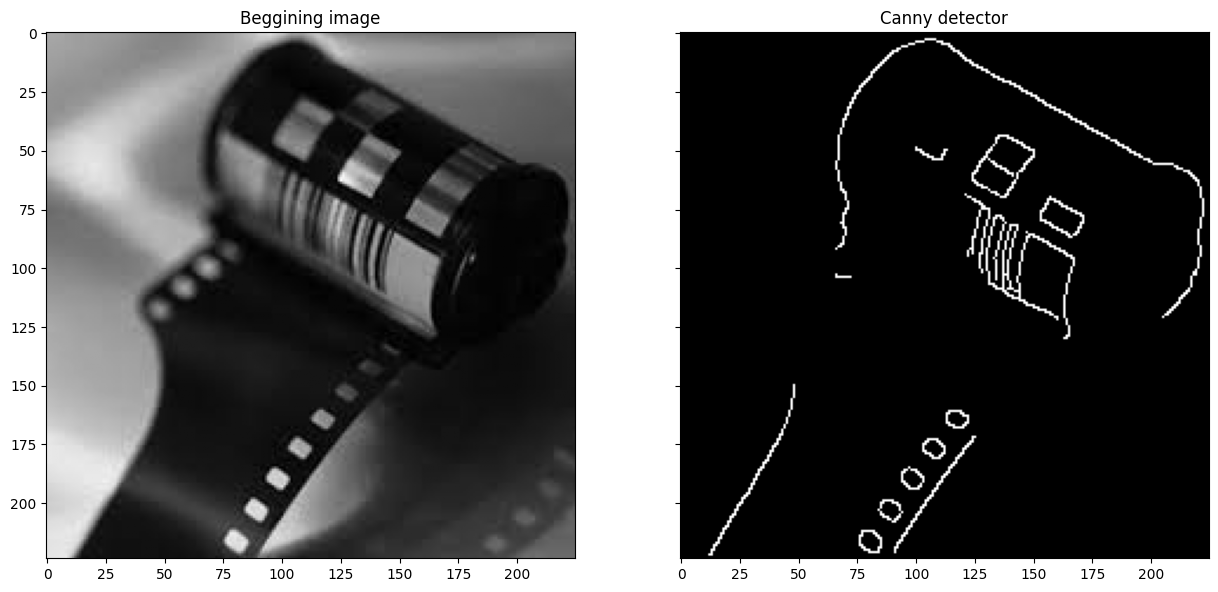

In [88]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 15))
ax[0].imshow(grey, cmap="gray")
ax[1].imshow(canny_result, cmap="gray")
ax[0].set_title("Beggining image")
ax[1].set_title("Canny detector")

Score: 234 | Index: (52, 22)
Score: 212 | Index: (54, 21)
Score: 182 | Index: (53, 21)


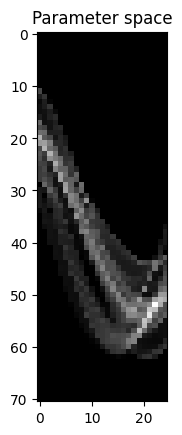

In [93]:
# HOUGH TRANSFORM

rho = 9
theta = 0.261 / 2
threshold = 192


hough_transform = HoughTransform.HoughTransform(canny_result, theta, rho)

accumulator, lines = hough_transform.hough_lines(threshold, -np.pi / 2, np.pi / 2)
lines = np.array(lines)
accumulator = np.array(accumulator)

try:
    # Show the image with the lines found
    lines_img, mask = py_visual.draw_lines(image, lines)
except ValueError:
    print("**********************CHECK THRESHOLD VALUE**********************")


# Print biggest 3 values:
top_n_values, top_n_indices = accumulator.ravel()[
    np.argsort(accumulator, axis=None)[-3:]
], np.unravel_index(np.argsort(accumulator, axis=None)[-3:], accumulator.shape)
flat_indices = np.argsort(accumulator, axis=None)
top_3_flat = flat_indices[-3:]
top_3_indices = np.unravel_index(np.flip(top_3_flat), accumulator.shape)
for r_idx, t_idx in zip(top_3_indices[0], top_3_indices[1]):
    score = accumulator[r_idx, t_idx]
    print(f"Score: {score:.0f} | Index: ({r_idx}, {t_idx})")

plt.imshow(accumulator, cmap="gray")
plt.title("Parameter space")
plt.show()

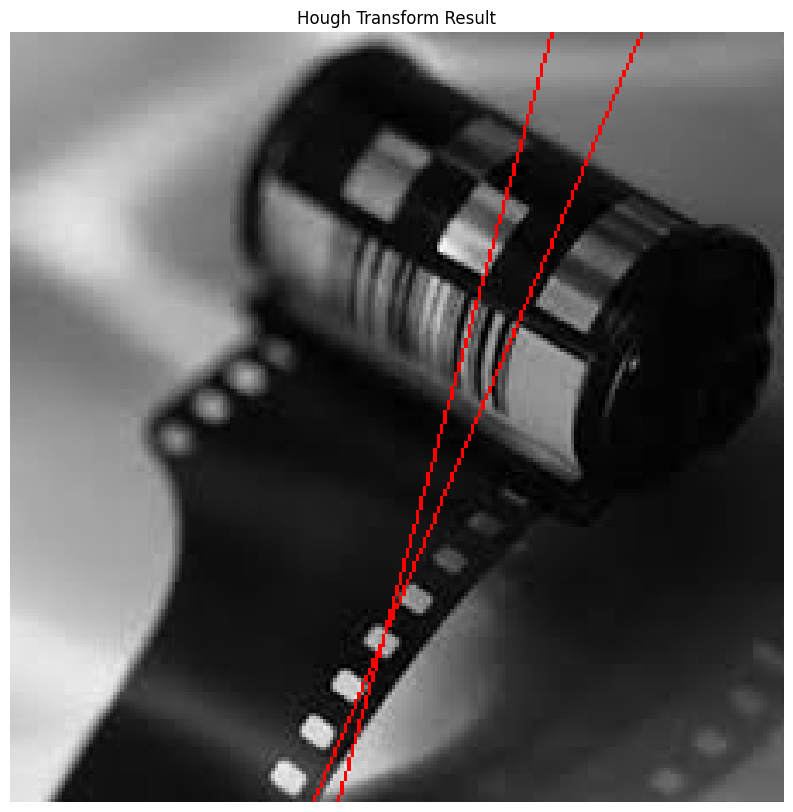

In [94]:
lines_img_rgb = cv.cvtColor(lines_img, cv.COLOR_BGR2RGB)

# 2. Configure the plot
plt.figure(figsize=(10, 10))  # Optional: Make the image larger
plt.imshow(lines_img_rgb)
plt.axis("off")  # Optional: Hide the axes (numbers on the side)
plt.title("Hough Transform Result")
plt.show()

Book Page

In [107]:
image_path = (
    "D:\\Source\\Diplom\\tryouts\\tryout2_image_deskweing\\implementation\\images\\1_1.jpg"
)
image = Image.open(image_path).convert("L")
image = np.array(image)
grey = np.array(image, dtype=np.float64) / 255.0

start_time = time.time()

canny = EdgeDetector.CannyEdgeDetector()

canny_result = canny.get_canny_img(grey, sigma=1, hight_threshold=0.45)

end_time = time.time()

print(f"Time to find edges: {end_time-start_time}")

Time to find edges: 1.1063199043273926


Text(0.5, 1.0, 'Canny detector')

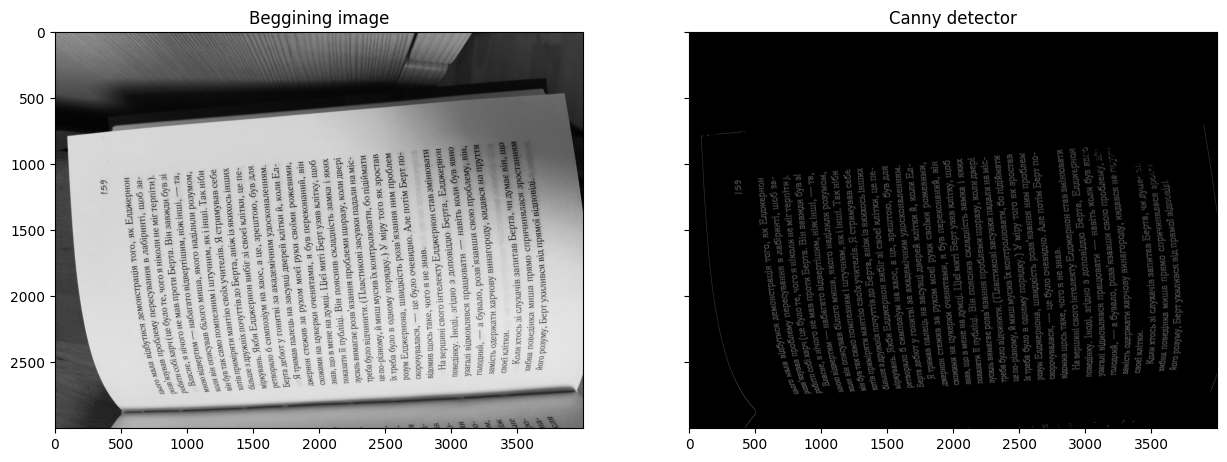

In [108]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 15))
ax[0].imshow(grey, cmap="gray")
ax[1].imshow(canny_result, cmap="gray")
ax[0].set_title("Beggining image")
ax[1].set_title("Canny detector")

Score: 2477 | Index: (310, 3)
Score: 2359 | Index: (281, 2)
Score: 2354 | Index: (837, 49)


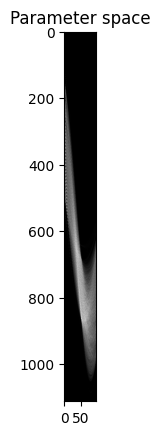

In [117]:
# HOUGH TRANSFORM

rho = 9
theta = 0.261 / 8
threshold = 2354


hough_transform = HoughTransform.HoughTransform(canny_result, theta, rho)

accumulator, lines = hough_transform.hough_lines(threshold, -np.pi / 2, np.pi / 2)
lines = np.array(lines)
accumulator = np.array(accumulator)

try:
    # Show the image with the lines found
    lines_img, mask = py_visual.draw_lines(image, lines)
except ValueError:
    print("**********************CHECK THRESHOLD VALUE**********************")


# Print biggest 3 values:
top_n_values, top_n_indices = accumulator.ravel()[
    np.argsort(accumulator, axis=None)[-3:]
], np.unravel_index(np.argsort(accumulator, axis=None)[-3:], accumulator.shape)
flat_indices = np.argsort(accumulator, axis=None)
top_3_flat = flat_indices[-3:]
top_3_indices = np.unravel_index(np.flip(top_3_flat), accumulator.shape)
for r_idx, t_idx in zip(top_3_indices[0], top_3_indices[1]):
    score = accumulator[r_idx, t_idx]
    print(f"Score: {score:.0f} | Index: ({r_idx}, {t_idx})")

plt.imshow(accumulator, cmap="gray")
plt.title("Parameter space")
plt.show()

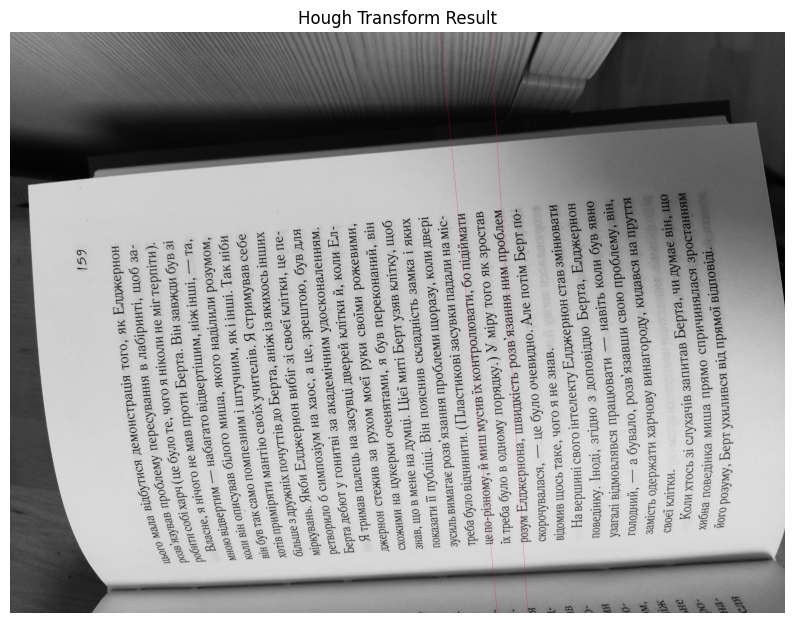

In [118]:
lines_img_rgb = cv.cvtColor(lines_img, cv.COLOR_BGR2RGB)

# 2. Configure the plot
plt.figure(figsize=(10, 10))  # Optional: Make the image larger
plt.imshow(lines_img_rgb)
plt.axis("off")  # Optional: Hide the axes (numbers on the side)
plt.title("Hough Transform Result")
plt.show()